In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#col_name=['CRIM ','ZN ','INDUS ','CHAS','NOX ','RM ','AGE','DIS','RAD','TAX','PTRATIO','B ','LSTAT','MEDV']
#data=pd.read_table("housing.data",sep="\s+",names=col_name)

In [3]:
#data.head()
#data.shape

In [4]:
#data.to_csv("housing.csv")

In [92]:
data=pd.read_csv("housing.csv")

In [93]:
data.head()

data.shape

(506, 14)

In [7]:
data.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
data.memory_usage(deep=True)

Index       128
CRIM       4048
ZN         4048
INDUS      4048
CHAS       4048
NOX        4048
RM         4048
AGE        4048
DIS        4048
RAD        4048
TAX        4048
PTRATIO    4048
B          4048
LSTAT      4048
MEDV       4048
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c5e78a410>,
      dtype=object)

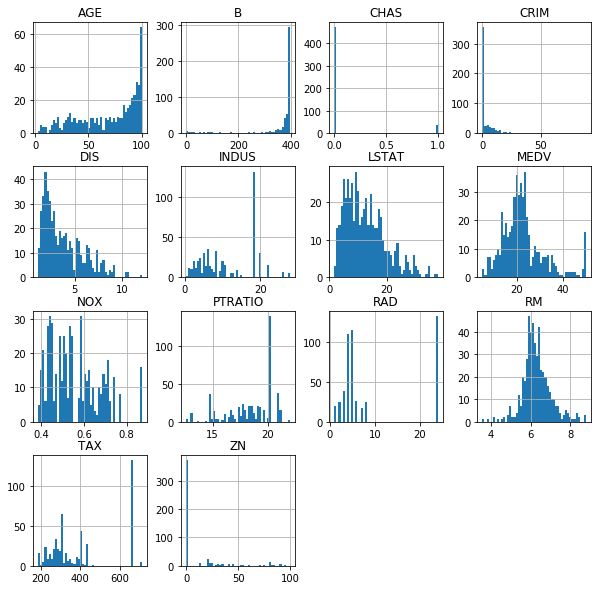

In [10]:
data.hist(bins=50,figsize=(10,10))

In [94]:
def train_test_split(data,train_size):
    m=len(data)
    train=data.sample(frac=train_size,random_state=42)
    test=data.loc[~data.index.isin(train.index),:]
    return train,test

In [95]:
x_train,x_test=train_test_split(data,0.70)

In [96]:
x_train.shape[0]+x_test.shape[0]


506

In [14]:
data.shape

(506, 14)

In [15]:
x_train.CHAS.value_counts()

0    329
1     25
Name: CHAS, dtype: int64

In [16]:
x_test.CHAS.value_counts()

0    142
1     10
Name: CHAS, dtype: int64

# Stratified Sampling

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

In [104]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)
for train,test in split.split(data,data.CHAS):
    x_train=data.iloc[train,:]
    x_test=data.iloc[test,:]
    

In [48]:
x_train.shape

(354, 14)

In [49]:
x_test.shape

(152, 14)

In [50]:
x_train.CHAS.value_counts()

0    330
1     24
Name: CHAS, dtype: int64

In [51]:
x_test.CHAS.value_counts()

0    141
1     11
Name: CHAS, dtype: int64

In [52]:
#corelation matrix
cor_mat=data.corr()
cor_mat #dataframe
cor_mat["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c329c6f10>,
      dtype=object)

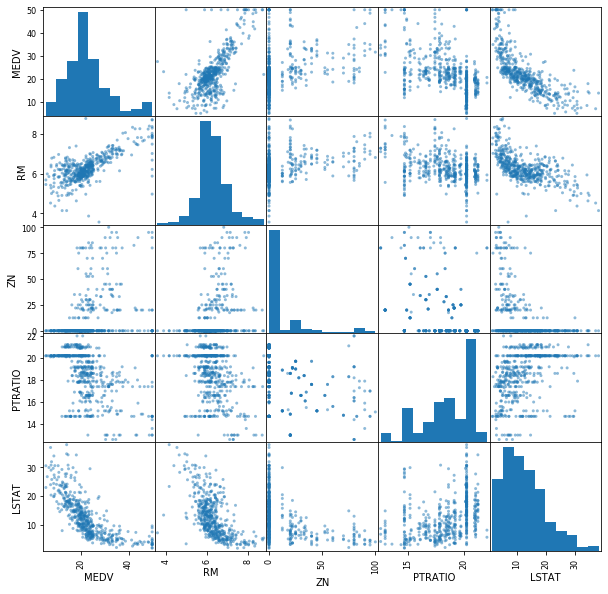

In [25]:
#scaltter plot
from pandas.plotting import scatter_matrix
attr=["MEDV","RM","ZN","PTRATIO","LSTAT"]
scatter_matrix(data[attr],figsize=(10,10))

In [102]:
data["tax_per_room"]=data["TAX"]/data["RM"]

In [103]:
cor_mat=data.corr()
cor_mat['MEDV'].sort_values(ascending=False)

MEDV            1.000000
RM              0.695360
ZN              0.360445
B               0.333461
DIS             0.249929
CHAS            0.175260
AGE            -0.376955
RAD            -0.381626
CRIM           -0.388305
NOX            -0.427321
TAX            -0.468536
INDUS          -0.483725
PTRATIO        -0.507787
tax_per_room   -0.537650
LSTAT          -0.737663
Name: MEDV, dtype: float64

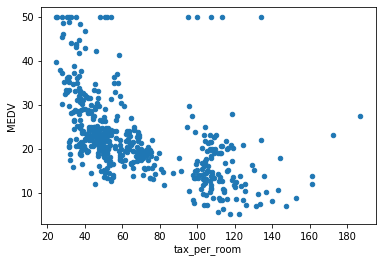

In [99]:
data.plot(kind="scatter",x='tax_per_room',y='MEDV')

In [105]:
x_tr=x_train.drop('MEDV',axis=1)
y_tr=x_train.MEDV
x_ts=x_test.drop('MEDV',axis=1)
y_ts=x_test.MEDV

In [106]:
x_tr.shape

(354, 14)

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [39]:
pipe=Pipeline([
   ( 'imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

In [121]:
x_tr=pipe.fit_transform(x_tr)

In [122]:
x_tr

array([[-0.43031222,  1.03300622, -0.76454953, ...,  0.43295357,
        -0.4513261 , -0.56099304],
       [-0.39272617, -0.49583028, -0.21197655, ...,  0.43819443,
        -0.38574732, -0.529947  ],
       [-0.43090588, -0.49583028, -0.89507858, ...,  0.42289966,
        -0.30342502, -0.93876322],
       ...,
       [ 0.40931463, -0.49583028,  0.97728812, ..., -3.77289395,
         1.47278318,  1.31434502],
       [-0.38956876, -0.49583028, -0.11190428, ...,  0.42749879,
         1.56905841, -0.51873006],
       [ 0.1342625 , -0.49583028,  0.97728812, ..., -3.25522485,
         0.7528119 ,  1.09078091]])

In [123]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_tr,y_tr)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
some_data=x_train.drop('MEDV',axis=1)
some_data=some_data.iloc[:5,:]
some_data=pipe.transform(some_data)
some_label=x_train.MEDV.iloc[:5]

In [127]:
some_label

301    22.0
309    20.3
337    18.5
74     24.1
429     9.5
Name: MEDV, dtype: float64

In [130]:
predict=linreg.predict(some_data)

In [131]:
from sklearn.metrics import mean_squared_error
err=mean_squared_error(predict,some_label)

In [132]:
err

9.382396913064536

In [134]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_tr,y_tr)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [135]:
predict=model.predict(some_data)

In [136]:
err=mean_squared_error(predict,some_label)

In [137]:
err

0.0

In [163]:
from sklearn.model_selection import cross_val_score
errs=cross_val_score(model,x_tr,y_tr,scoring="neg_mean_squared_error",cv=5)

In [164]:
errs=np.sqrt(-errs)
errs.mean()

4.876585027624681

In [165]:
errs=cross_val_score(linreg,x_tr,y_tr,scoring="neg_mean_squared_error",cv=5)

In [166]:
errs=np.sqrt(-errs)
errs.mean()

4.20445778479975

In [174]:
from sklearn.ensemble import RandomForestRegressor
forest_model=RandomForestRegressor(n_estimators=10)
#forest_model.fit(x_tr,y_tr)
#predict=forest_model.predict(x_tr)

In [175]:
errs=cross_val_score(forest_model,x_tr,y_tr,scoring="neg_mean_squared_error",cv=5)

In [176]:
errs=np.sqrt(-errs)

In [177]:
errs.mean()

3.781217218598813

In [178]:
#randomm forest final


In [182]:
x_ts=pipe.transform(x_ts)

In [183]:
final_predict=model.predict(x_ts)

In [184]:
errs=mean_squared_error(y_ts,final_predict)

In [185]:
errs=np.sqrt(errs)

In [186]:
errs

4.198817189337216